## Hoops and Stats: Unveiling the Secrets of NCAA Basketball Success

### By Daniel Lightner and Marcus Amerine

The College Basketball Dataset consists of statistics from NCAA Division I basketball teams across the 2013 to 2023 seasons, excluding the 2020 season, which was not played due to the Coronavirus pandemic. This dataset combines data from the 2013-2019 seasons and the 2021-2023 seasons. It includes a variety of performance metrics, such as adjusted offensive and defensive efficiency, shooting percentages, and wins. Analyzing this dataset allows us to uncover factors that contribute to a team's success in the NCAA tournament.

All of the variables within the cbb.csv file

- **TEAM**: The name of the Division I college basketball school.
- **CONF**: The Athletic Conference in which the school participates (e.g., ACC, Big Ten).
- **G**: Total number of games played by the team in the season.
- **W**: Total number of games won by the team in the season.
- **ADJOE**: Adjusted Offensive Efficiency; a measure of points scored per 100 possessions against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; a measure of points allowed per 100 possessions against average offenses. 
- **BARTHAG**: Power Rating indicating the team's chance of beating an average Division I team.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team.
- **EFG_D**: Effective Field Goal Percentage allowed by the team.
- **TOR**: Turnover Percentage Allowed; the rate at which opponents commit turnovers against the team.
- **TORD**: Turnover Percentage Committed; the rate at which the team commits turnovers.
- **ORB**: Offensive Rebound Rate; the percentage of available offensive rebounds secured by the team.
- **DRB**: Defensive Rebound Rate; the percentage of available defensive rebounds secured by the team.
- **FTR**: Free Throw Rate; the frequency with which the team shoots free throws per field goal attempt.
- **FTRD**: Free Throw Rate Allowed; the frequency with which opponents shoot free throws against the team.
- **2P_O**: Two-Point Shooting Percentage for shots taken by the team.
- **2P_D**: Two-Point Shooting Percentage allowed by the team.
- **3P_O**: Three-Point Shooting Percentage for shots taken by the team.
- **3P_D**: Three-Point Shooting Percentage allowed by the team.
- **ADJ_T**: Adjusted Tempo; an estimate of possessions per 40 minutes against average tempo.
- **WAB**: Wins Above Bubble; indicates how many wins above the cut-off for NCAA tournament qualification a team has.
- **POSTSEASON**: The round in which the team was eliminated in the NCAA tournament (e.g., R64, S16).
- **SEED**: The seed assigned to the team in the NCAA March Madness Tournament.
- **YEAR**: The season year of the data (e.g., 2021).


### Key Variables for Analysis - These variables are important because they will be explored further (either here or later).

- **ADJOE**: Adjusted Offensive Efficiency; helps evaluate a team's scoring capabilities against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; provides insight into how well a team prevents scoring against average offenses.
- **WAB**: Wins Above Bubble; indicates a team's performance relative to the NCAA tournament qualification threshold.

### Main ones for analysis above in this EDA



- **SEED**: The seed assigned to a team in the NCAA tournament, reflecting their perceived strength.
- **POSTSEASON**: The round where the team was eliminated, indicating tournament success.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team; a crucial metric for shooting efficiency.
- **3P_O**: Three-Point Shooting Percentage; important for understanding a team's ability to score from beyond the arc.
- **ADJ_T**: Adjusted Tempo; assesses the pace of play and how it may affect game outcomes.
- **BARTHAG**: Power Rating; offers a comparative measure of a team's strength against average Division I teams.
- **FTR**: Free Throw Rate; shows how often a team capitalizes on free throw opportunities, affecting overall scoring.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
df = pd.read_csv('cbb.csv')

In [155]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

POSTSEASON    2843
SEED          2843
dtype: int64


In [156]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [157]:
df.select_dtypes(include=['number']).skew()

G         -1.272095
W          0.239642
ADJOE      0.190862
ADJDE     -0.040447
BARTHAG    0.141466
EFG_O     -0.000657
EFG_D     -0.003541
TOR        0.263764
TORD       0.369657
ORB       -0.059105
DRB        0.062284
FTR        0.270543
FTRD       0.495213
2P_O       0.098560
2P_D       0.018036
3P_O       0.024279
3P_D       0.032285
ADJ_T      0.163960
WAB        0.254546
SEED      -0.066725
YEAR       0.154283
dtype: float64

In [158]:
# Set label and features
y = df['EFG_O']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['EFG_O', "SEED", "EFG_D", "ADJDE", "TORD", "DRB", "BARTHAG", "2P_D", "ADJ_T", "3P_D", "FTRD"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                  EFG_O   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 5.381e+04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:27:24   Log-Likelihood:                -84.833
No. Observations:                3523   AIC:                             191.7
Df Residuals:                    3512   BIC:                             259.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G             -0.0220      0.002    -10.640      0.0

### Let's look back at our assumptions

**Assumptions:**
* **Normality**: Omnibus and Jarque-Bera (safe: p-value *high*)
    * *Residuals* need to be normally distributed
    * p < 0.05 means **problem with normality**
* **Multicollinearity**: Are there strong relationships between any two variables, to the point where an increase/decrease in one will strongly affect the other?
    * *Condition Number (Cond. No.)*: safe: < 10, okay: < 30, but can go as high as 100 (**NOTE: VIFs are more reliable**)
    * *VIF:* below 3 (great), 5 (good), 10 (okay)
    * *Tolerance:* above 0.1 (good enough) or 0.2 (better) *(Some sources say cutoff should be 0.25)*
* **Autocorrelation**: How dependent are the variables on *time*? This is a whole other set of statistical analysis called *time series*
    * *Durban-Watson*: Safe between 1 and 2

### Off of this, we can tell that our has a problem with *Normality* and *Multicollinearity*

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Feature            VIF
0        G       3.832325
1        W      14.734108
2    ADJOE      16.973551
3      TOR       3.502490
4      ORB       3.038745
5      FTR       1.545903
6     2P_O       4.022113
7     3P_O       2.967366
8      WAB      13.583611
9     YEAR       1.717938
10   const  660610.926126


We can see the three variables (G, W, and WAB) are correlated - which makes sense as they are statistics pertaining the winning basketball games, not necessarrily towards our offensive field goal efficiency. I am also going to remove G, because its coefficient has 0 and barely impacts our model.

In [160]:
# Set label and features
y = df['EFG_O']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['EFG_O', "SEED", "EFG_D", "ADJDE", "TORD", "DRB", "BARTHAG", "2P_D", "ADJ_T", "3P_D", "TOR", "FTRD", "ADJOE", "W", "WAB", "G", "YEAR"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                  EFG_O   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.246e+05
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:27:24   Log-Likelihood:                -222.32
No. Observations:                3523   AIC:                             454.6
Df Residuals:                    3518   BIC:                             485.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ORB           -0.0074      0.001     -6.669      0.0

Let's begin to attempt to fix our normality

In [161]:
df_insample = pd.DataFrame({'Actual':df['EFG_O'], 
                            'Predicted':model.fittedvalues, 
                            'Residuals (Error)':df['EFG_O'] - model.fittedvalues})

df_insample.head(10)

,Actual,Predicted,Residuals (Error)
0,52.6,52.082283,0.517717
1,54.8,54.758641,0.041359
2,53.9,54.060349,-0.160349
3,53.5,53.520838,-0.020838
4,56.6,56.643723,-0.043723
5,49.9,49.775867,0.124133
6,54.6,54.637740,-0.037740
7,56.6,56.611290,-0.011290
8,55.2,54.935932,0.264068
9,51.7,51.719967,-0.019967


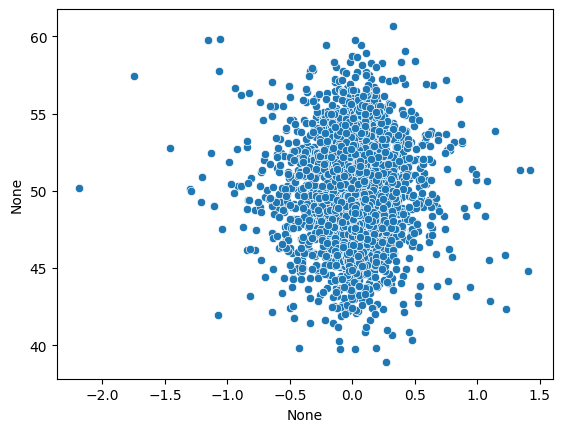

In [162]:
pred_val = model.fittedvalues.copy()
true_val = df['EFG_O'].values.copy()
residual = true_val - pred_val

ax = sns.scatterplot(x=residual, y=pred_val)

np.float64(0.9189528382019565)

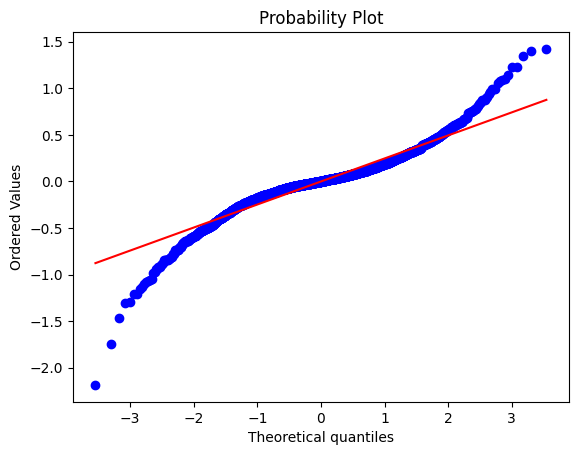

In [163]:
import scipy as sp
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature         VIF
0     ORB    1.145085
1     FTR    1.129625
2    2P_O    1.179560
3    3P_O    1.181456
4   const  371.785069


##### This OLS regression model predicts Effective Field Goal Percentage (EFG_O) using four independent variables: Offensive Rebound Rate (ORB), Free Throw Rate (FTR), Two-Point Shooting Percentage (2P_O), and Three-Point Shooting Percentage (3P_O). The model has an R-squared of 0.993, indicating that it explains 99.3% of the variance in EFG_O, meaning the predictors are highly effective. Both 2P_O and 3P_O have strong positive effects on EFG_O, with 2P_O (coef = 0.6416) having a slightly stronger impact than 3P_O (coef = 0.5391). Interestingly, ORB and FTR have small negative coefficients, suggesting that teams with higher offensive rebounding or free throw rates tend to have slightly lower EFG_O, though the effect sizes are minimal.
##### All predictors are statistically significant (p < 0.05), meaning their relationships with EFG_O are unlikely due to chance. However, the Jarque-Bera test (p < 0.05) suggest that the residuals deviate from normality, which could impact inference. The Durbin-Watson statistic (2.020) indicates no strong autocorrelation in residuals. Finally, the condition number (1.45e+03) hints at possible multicollinearity, meaning some predictors may be highly correlated. Overall, while the model is highly predictive, checking residual normality and multicollinearity would strengthen its validity.

#### To further evaluate our model, I analyzed the residuals and multicollinearity. A Q-Q plot of residuals showed tailing off at both ends, suggesting deviations from normality. Despite this, the R² value from the probability plot was 0.919, indicating that residuals largely follow a normal distribution. Examining residuals against actual and predicted values showed mostly small errors, but some variation remains. Checking for multicollinearity using Variance Inflation Factors (VIF) revealed that ORB, FTR, 2P_O, and 3P_O all had low VIF values (below 1.2), meaning minimal correlation among predictors. It should be noted too our F-statistic in this model is significantly higher than our first model with most of the variables.

## Now we will begin to look into 3pt shot in regards to time series.

In [165]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df['3P_O'], autolag='AIC')
print("P-value: ", stationarity[1])
#monthly stationarity test

P-value:  2.302019519137838e-13


In [166]:
print(df["YEAR"])


0       2016
1       2015
2       2018
3       2019
4       2017
        ... 
3518    2023
3519    2023
3520    2023
3521    2023
3522    2023
Name: YEAR, Length: 3523, dtype: int64


In [167]:
# Set 'YEAR' as the index without renaming it
df.index = pd.to_datetime(df['YEAR'], format='%Y')

# Now perform the grouping and aggregation
df_year = df.groupby(df['YEAR']).agg({
    'G': 'sum',             # Total games played per year
    'W': 'sum',             # Total wins per year
    'ADJOE': 'mean',        # Avg. offensive efficiency
    'ADJDE': 'mean',        # Avg. defensive efficiency
    'BARTHAG': 'mean',      # Avg. power rating
    'EFG_O': 'mean',        # Avg. effective FG%
    'EFG_D': 'mean',        # Avg. opponent EFG%
    'TOR': 'mean',          # Avg. turnover rate
    'TORD': 'mean',         # Avg. opponent turnover rate
    'FTR': 'mean',          # Avg. free throw rate
    'FTRD': 'mean',         # Avg. opponent FTR
    '2P_O': 'mean',         # Avg. 2P%
    '2P_D': 'mean',         # Avg. opponent 2P%
    '3P_O': 'mean',         # Avg. 3P%
    '3P_D': 'mean',         # Avg. opponent 3P%
    'ADJ_T': 'mean',        # Avg. tempo
    'WAB': 'sum',           # Total Wins Above Bubble
    'SEED': 'mean'          # Avg. NCAA seed (only for tournament teams)
})

df_year


,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
YEAR,,,,,,,,,,,,,,,,,,
2013,10922,5461,100.804611,100.806052,0.495413,48.536023,48.742651,20.025937,19.954755,35.970605,36.227666,47.460231,47.670029,33.724207,33.952450,65.954467,-2773.9,8.823529
2014,11006,5503,104.584900,104.584046,0.495318,49.481197,49.686895,18.371795,18.281197,40.473219,40.800285,48.458689,48.659544,34.294302,34.506553,66.595726,-2611.4,8.838235
2015,10998,5499,102.315385,102.311681,0.493902,48.973789,49.180627,19.125641,19.039886,37.043305,37.326781,47.732194,47.917379,34.165527,34.402564,64.936467,-2725.5,8.794118
2016,11032,5515,103.866382,103.866382,0.492795,49.777208,49.970085,18.184046,18.119943,36.638177,36.936182,48.661823,48.823077,34.537892,34.729630,69.100855,-2745.4,8.779412
2017,11070,5968,103.840456,103.841880,0.492494,50.381197,50.573219,18.594017,18.543305,35.328205,35.642450,49.283191,49.436467,34.860969,35.054131,69.481766,-2754.4,8.794118
2018,11080,5991,104.354986,104.357265,0.494586,50.866667,51.062963,18.448718,18.379772,33.537607,33.770940,49.937322,50.074074,34.966952,35.123647,69.419373,-2796.9,8.794118
2019,11206,6041,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,32.954391,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-2747.6,8.794118
2021,7711,4185,101.921902,101.940922,0.493132,49.994236,50.224207,18.972911,18.900865,31.605187,31.887032,49.702017,49.924207,33.663689,33.838040,68.428530,-2018.4,8.794118
2022,10950,5959,102.297765,102.297486,0.495225,49.897486,50.091061,18.426816,18.371508,30.320670,30.616480,49.700279,49.862011,33.480447,33.660894,67.144413,-2667.1,8.808824


In [168]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df_year['3P_O'], autolag='AIC')
print("P-value: ", stationarity[1])
#monthly stationarity test

P-value:  0.3007235830596683


In [169]:
# First-order differencing (removes trend)
df_year['3P_O_diff_1'] = df_year['3P_O'].diff(periods=1)

# Second-order differencing (removes trend and possible seasonality effects)
df_year['3P_O_diff_2'] = df_year['3P_O'].diff(periods=2)

# Display the first few rows
df_year.head()


,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,3P_O_diff_1,3P_O_diff_2
YEAR,,,,,,,,,,,,,,,,,,,,
2013,10922,5461,100.804611,100.806052,0.495413,48.536023,48.742651,20.025937,19.954755,35.970605,36.227666,47.460231,47.670029,33.724207,33.952450,65.954467,-2773.9,8.823529,NaN,NaN
2014,11006,5503,104.584900,104.584046,0.495318,49.481197,49.686895,18.371795,18.281197,40.473219,40.800285,48.458689,48.659544,34.294302,34.506553,66.595726,-2611.4,8.838235,0.570095,NaN
2015,10998,5499,102.315385,102.311681,0.493902,48.973789,49.180627,19.125641,19.039886,37.043305,37.326781,47.732194,47.917379,34.165527,34.402564,64.936467,-2725.5,8.794118,-0.128775,0.441320
2016,11032,5515,103.866382,103.866382,0.492795,49.777208,49.970085,18.184046,18.119943,36.638177,36.936182,48.661823,48.823077,34.537892,34.729630,69.100855,-2745.4,8.779412,0.372365,0.243590
2017,11070,5968,103.840456,103.841880,0.492494,50.381197,50.573219,18.594017,18.543305,35.328205,35.642450,49.283191,49.436467,34.860969,35.054131,69.481766,-2754.4,8.794118,0.323077,0.695442


In [170]:
# monthly aggregate of precipitation
y = df_year['3P_O_diff_1']
X = df_year.drop(columns=['3P_O', "3P_O_diff_1", "3P_O_diff_2", "SEED"]).assign(const=1)
# Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())  # View results

#YEARLY MODEL

                            OLS Regression Results                            
Dep. Variable:            3P_O_diff_1   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 24 Feb 2025   Prob (F-statistic):                nan
Time:                        20:27:24   Log-Likelihood:                    nan
No. Observations:                  10   AIC:                               nan
Df Residuals:                       0   BIC:                               nan
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
G                 nan        nan        nan        n

c:\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
